In [1]:
import oofempy
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('static')
pv.start_xvfb()
 

 

In [2]:
dr=oofempy.OOFEMTXTDataReader("/home/jovyan/oofem/examples/c.in")
dr
problem=oofempy.InstanciateProblem(dr, oofempy.problemMode.processor, False, None, False)
problem.init()
problem.solveYourself()
vtkxmlPy = oofempy.vtkmemory(1, problem, domain_all=True, tstep_all=True, dofman_all=True, element_all=True, vars=(1,4), primvars=(1,), cellvars = (47,), stype=1, pythonExport=1)
vtkxmlPy.initialize()
vtkxmlPy.doOutput(problem.giveCurrentStep(), False)
vtkxmlPy



OctreeLocalizer: init
Spatial localizer init done
Computing initial guess

StaticStructural :: solveYourselfAt - Solving step 1, metastep 1, (neq = 885)
CALMLS:       Initial step length: 2.500000e-02   
CALMLS:       Iteration       LoadLevel       ForceError      DisplError    
----------------------------------------------------------------------------
CALMLS:       1               6.105389e+00    1.532959e-13    1.034151e-14   
CALMLS:       Adjusted step length: 2.500000e-02   
Checking rules...
EngngModel info: user time consumed by solution step 1: 0.01s
Computing initial guess

StaticStructural :: solveYourselfAt - Solving step 2, metastep 1, (neq = 885)
CALMLS:       Initial step length: 2.500000e-02   
CALMLS:       Iteration       LoadLevel       ForceError      DisplError    
----------------------------------------------------------------------------
CALMLS:       1               1.221078e+01    2.253033e-13    5.261375e-15   
CALMLS:       Adjusted step length: 2.500000e-

  8.773163e-06   
CALMLS:       9               1.816145e+01    6.830101e-04    4.906554e-06   
CALMLS:       10              1.816109e+01    3.821175e-04    2.744495e-06   
CALMLS:       11              1.816089e+01    2.137797e-04    1.535270e-06   
CALMLS:       12              1.816078e+01    1.196012e-04    8.588707e-07   
CALMLS:       13              1.816072e+01    6.691212e-05    4.804876e-07   
CALMLS:       Adjusted step length: 2.500000e-02   
Checking rules...
EngngModel info: user time consumed by solution step 3: 0.03s
Computing initial guess

StaticStructural :: solveYourselfAt - Solving step 4, metastep 1, (neq = 885)
CALMLS:       Initial step length: 2.500000e-02   
CALMLS:       Iteration       LoadLevel       ForceError      DisplError    
----------------------------------------------------------------------------
CALMLS:       1               2.402592e+01    1.154636e-01    1.082441e-03   
CALMLS:       2               2.393380e+01    6.259961e-02    5.284547e-04

Piece: <oofempy.VTKPiece object at 0x7f1b392a1b70>
[[1000.        500.          0.      ]
 [ 900.          0.          0.      ]
 [ 850.755859    0.          0.      ]
 ...
 [1648.067993  107.169945    0.      ]
 [1843.716675  140.241135    0.      ]
 [1750.158691  168.39357     0.      ]]
[  3  13  47 ... 346 440 331]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5

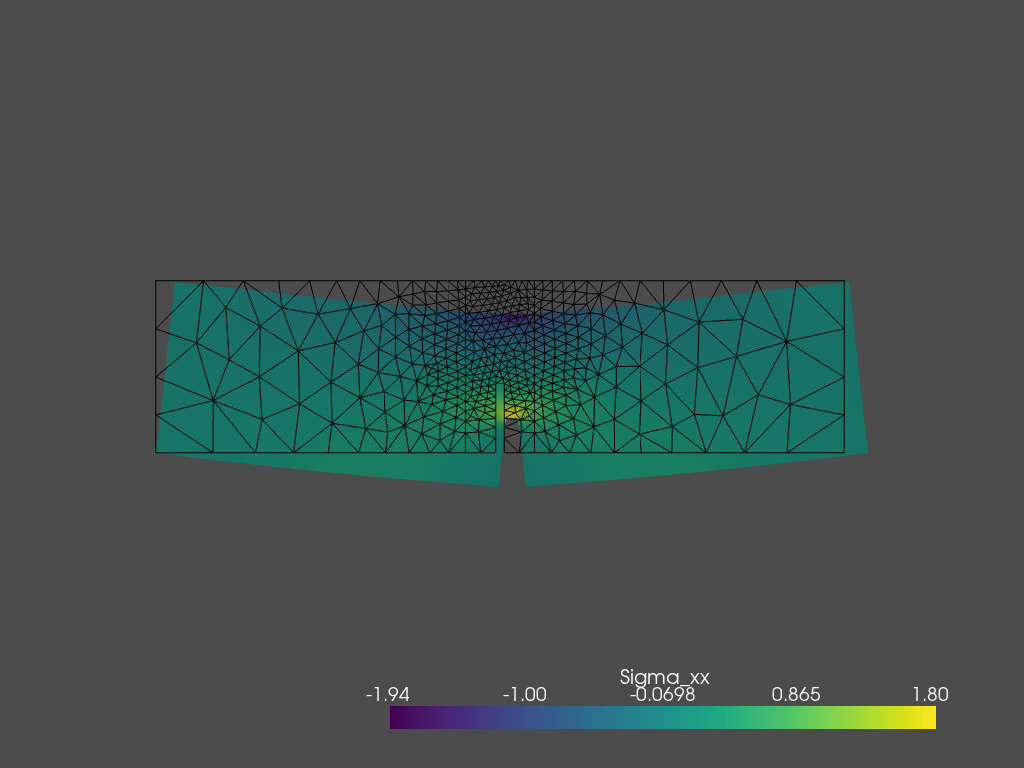

In [3]:
for p in vtkxmlPy.getVTKPieces():
#p = vtkxmlPy.getVTKPieces()[0]
    print ("Piece:", p)
    print(p.getVertices())
    print(p.getCellConnectivity())
    print(p.getCellTypes(vtkxmlPy))
    disp = p.getPrimaryVertexValues(oofempy.UnknownType.DisplacementVector)
    sig = p.getInternalVertexValues(oofempy.InternalStateType.IST_StressTensor)
    sigx = sig[:, 0]
    
    grid = pv.UnstructuredGrid(p.getCellConnectivity(), p.getCellTypes(vtkxmlPy), p.getVertices())
    grid.point_arrays['Sigma_xx'] = sigx
    grid['Disp'] = disp
    print(grid.active_vectors)
    warped = grid.warp_by_vector('Disp', factor=1000.)
    p = pv.Plotter()
    p.add_mesh(warped, scalars='Sigma_xx')
    p.add_mesh(grid, style='wireframe', color='black')
    p.set_viewup((0,1,0))
    p.show()
problem.terminateAnalysis()